<a href="https://colab.research.google.com/github/GoreckiArtur/Zaawansowane-przetwarzanie-obrazu/blob/main/SCC_Kosaraju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

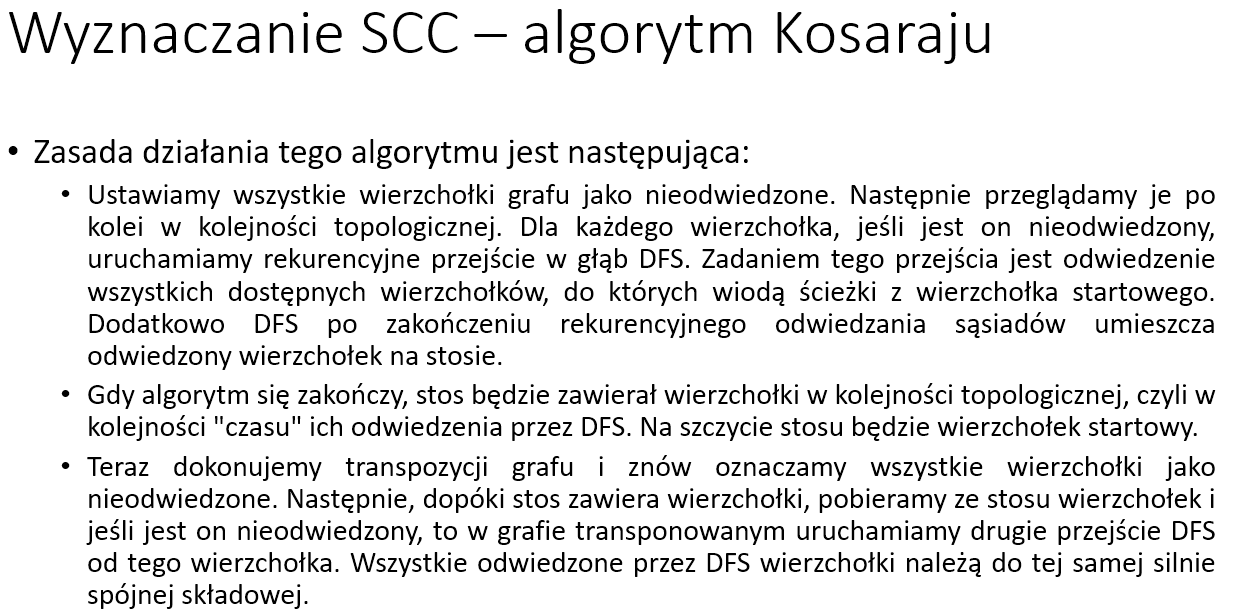

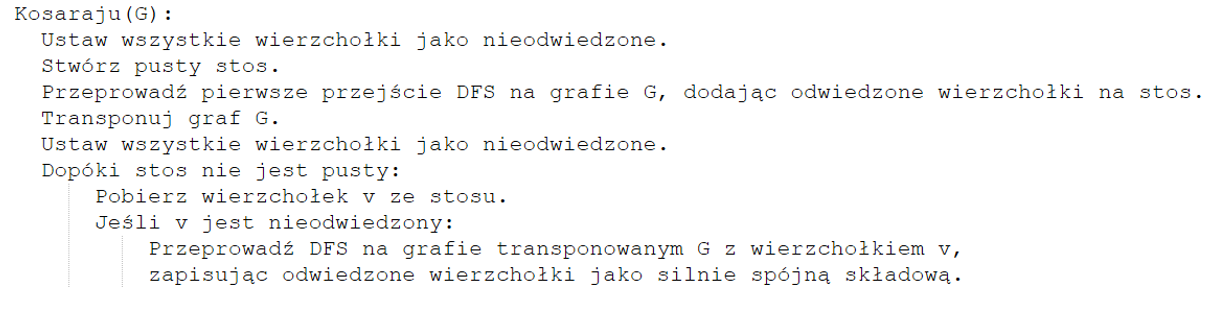

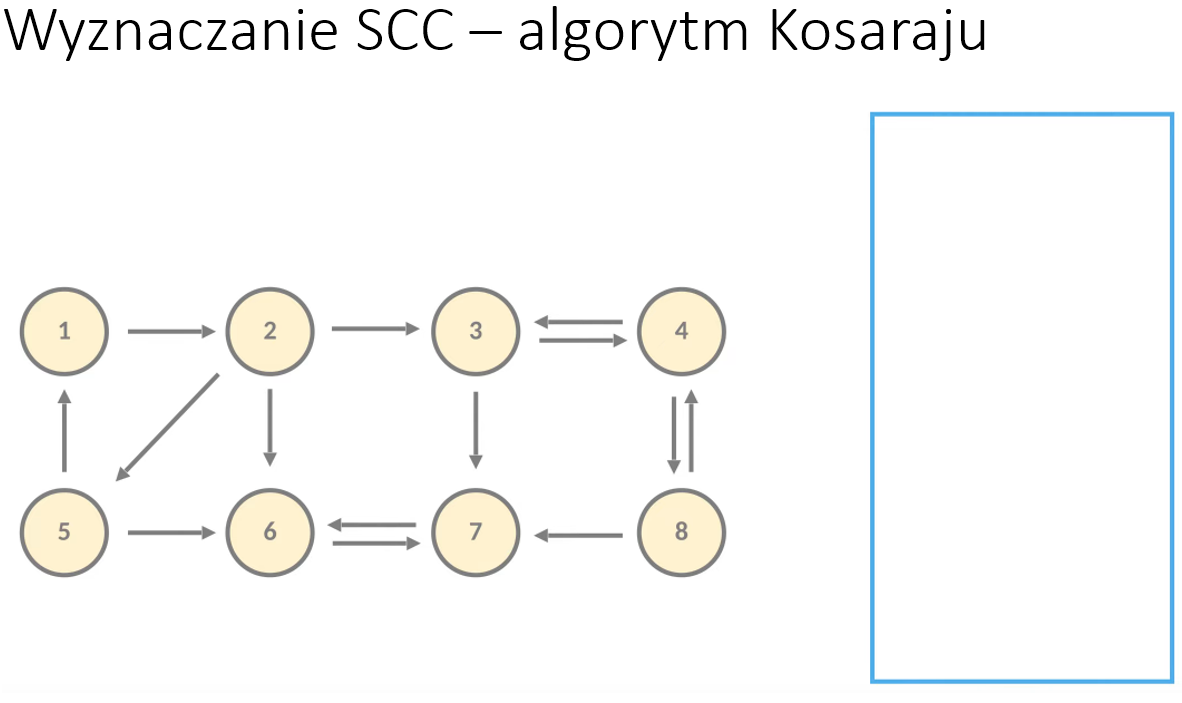

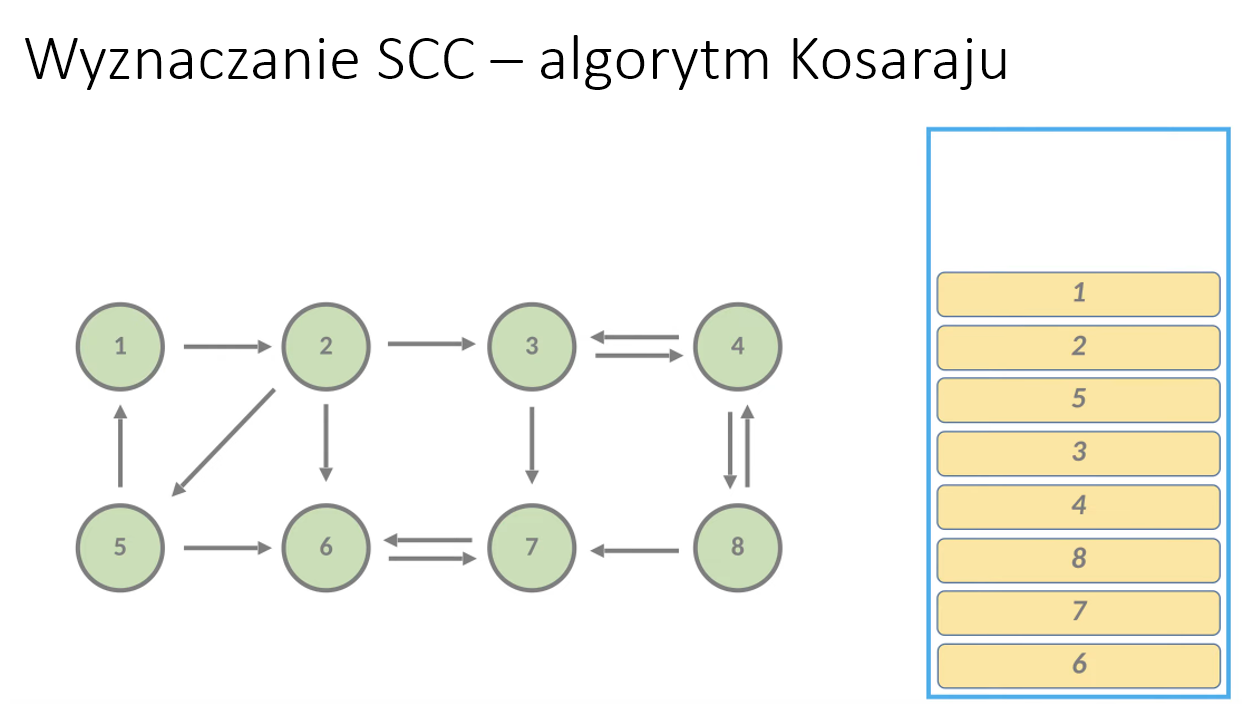

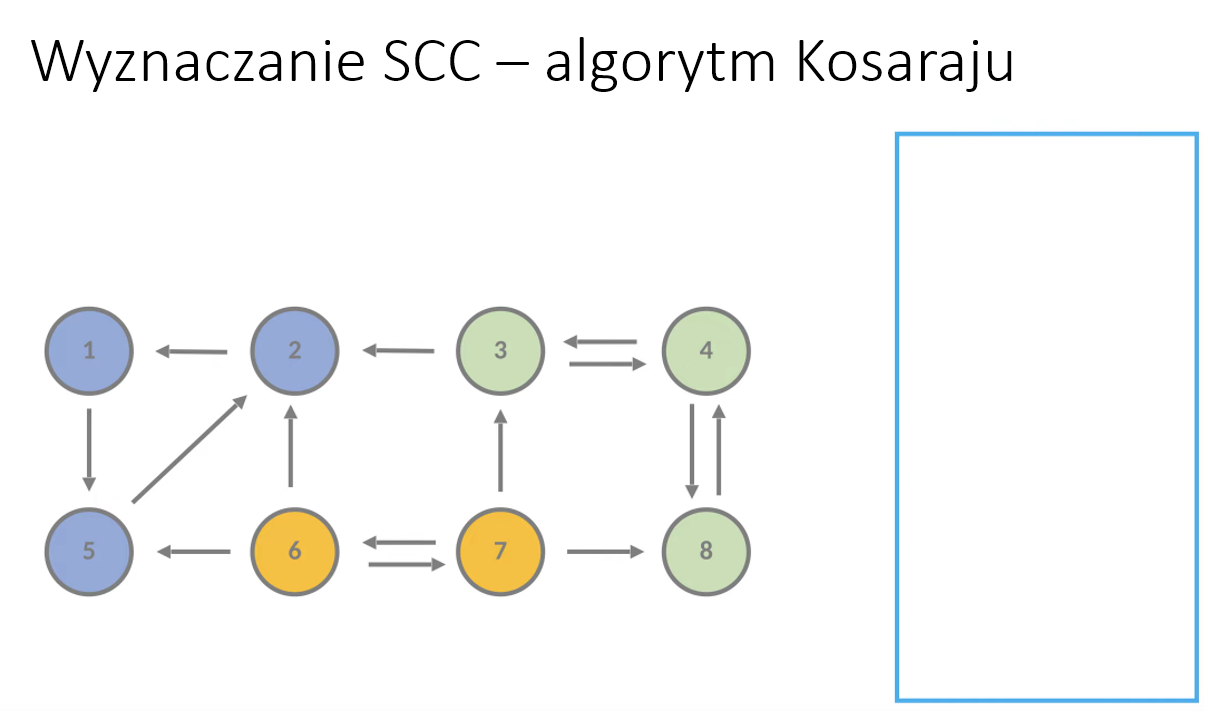

Wybierz tryb: wpisz 'd' dla wersji demonstracyjnej lub 'm' dla ręcznego wprowadzania danych: d
Krawędzie: (1, 2), (2, 5), (2, 6), (2, 3), (3, 4), (3, 7), (4, 3), (4, 8), (8, 4), (8, 7), (7, 6), (6, 7), (5, 1), (5, 6)
Silnie spójne składowe: [[1, 5, 2], [3, 4, 8], [6, 7]]


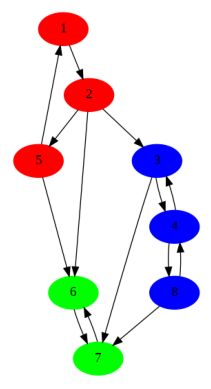

In [28]:
import contextlib
import os

# Instalacja wymaganych bibliotek bez wyświetlania komunikatów
with open(os.devnull, 'w') as fnull:
    with contextlib.redirect_stdout(fnull), contextlib.redirect_stderr(fnull):
        !apt-get install -y graphviz libgraphviz-dev pkg-config
        !pip install pygraphviz

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph

# Implementacja algorytmu Kosaraju
def kosaraju_scc(graph):
    def dfs(v, visited, stack):
        visited[v] = True
        for neighbor in graph[v]:
            if not visited[neighbor]:
                dfs(neighbor, visited, stack)
        stack.append(v)

    def reverse_dfs(v, visited, component):
        visited[v] = True
        component.append(v)
        for neighbor in reversed_graph[v]:
            if not visited[neighbor]:
                reverse_dfs(neighbor, visited, component)

    # Pierwsze przejście DFS
    stack = []
    visited = {node: False for node in graph}
    for node in graph:
        if not visited[node]:
            dfs(node, visited, stack)

    # Odwrócenie grafu
    reversed_graph = {node: [] for node in graph}
    for node in graph:
        for neighbor in graph[node]:
            reversed_graph[neighbor].append(node)

    # Drugie przejście DFS
    visited = {node: False for node in graph}
    scc = []
    while stack:
        node = stack.pop()
        if not visited[node]:
            component = []
            reverse_dfs(node, visited, component)
            scc.append(component)

    return scc

# Funkcja do wprowadzania krawędzi przez konsolę
def input_edges():
    edges = []
    print("Wprowadź krawędzie w formacie 'u v' (węzeł u, węzeł v). Wprowadź pustą linię, aby zakończyć.")
    while True:
        edge = input()
        if edge == "":
            break
        u, v = map(int, edge.split())
        edges.append((u, v))
    return edges

# Wybór trybu: demo czy ręczne wprowadzanie
def choose_mode():
    while True:
        choice = input("Wybierz tryb: wpisz 'd' dla wersji demonstracyjnej lub 'm' dla ręcznego wprowadzania danych: ").strip().lower()
        if choice in ['d', 'm']:
            return choice
        print("Niepoprawny wybór. Spróbuj ponownie.")

# Główna logika programu
mode = choose_mode()

if mode == 'd':
    print("Krawędzie: (1, 2), (2, 5), (2, 6), (2, 3), (3, 4), (3, 7), (4, 3), (4, 8), (8, 4), (8, 7), (7, 6), (6, 7), (5, 1), (5, 6)")
    edges = [(1, 2), (2, 5), (2, 6), (2, 3), (3, 4), (3, 7), (4, 3), (4, 8), (8, 4), (8, 7), (7, 6), (6, 7), (5, 1), (5, 6)]
else:
    edges = input_edges()

# Tworzenie grafu
G = nx.DiGraph()
G.add_edges_from(edges)

# Konwersja grafu NetworkX do formatu odpowiedniego dla naszej implementacji
graph_dict = {node: list(G.neighbors(node)) for node in G.nodes()}

# Znajdowanie silnie spójnych składowych
scc = kosaraju_scc(graph_dict)
print("Silnie spójne składowe:", scc)

# Konwersja grafu do formatu AGraph (pygraphviz)
A = to_agraph(G)

# Opcjonalne dostosowanie wyglądu grafu
A.graph_attr.update(splines="true", overlap="false")

# Dostosowanie wyglądu węzłów w zależności od przynależności do silnie spójnych składowych
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'pink', 'brown']
for i, component in enumerate(scc):
    for node in component:
        n = A.get_node(node)
        n.attr['color'] = colors[i % len(colors)]
        n.attr['style'] = 'filled'
        n.attr['fillcolor'] = colors[i % len(colors)]

# Rysowanie grafu
A.draw('graph.png', format='png', prog='dot')

# Wyświetlenie grafu
img = plt.imread('graph.png')
plt.imshow(img)
plt.axis('off')
plt.show()
